In [1]:
import pandas as pd
import numpy as np
import os
from itertools import permutations,combinations
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

data_dir = os.getcwd() + '/stock_data'
results_dir = os.getcwd() + '/Results'

In [2]:
#Read in all the stock data
data = []
#get_companies = ['AAPL','GE','KO','BAC','MSFT']
for f in os.listdir(data_dir):
    #if f.strip('.csv') in get_companies:
        df = pd.read_csv(data_dir + '/' +f)
        df['Date'] = pd.to_datetime(df['Date'])
        data.append((f.strip('.csv'),df.sort_values('Date')))
        print 'Got data for %s' %f.strip('.csv')

Got data for AAPL
Got data for AMD
Got data for BAC
Got data for CLDX
Got data for GE
Got data for JNJ
Got data for KO
Got data for MCD
Got data for MSFT
Got data for T


In [ ]:
#all_dfs = []
#for c, df in data:
#    df['company'] = c
#    all_dfs.append(df)

In [ ]:
#data = pd.concat(all_dfs)

In [3]:
dates = data[0][1]['Date']
adj_close = pd.DataFrame({'Date':dates})
pct_returns = pd.DataFrame({'Date':dates})
for i,j in data:
    adj_close[i] = j['Adj Close']
    pct_returns[i] = j['Adj Close'].pct_change(periods=1)
    
pct_returns = pct_returns[pct_returns.iloc[:,1].notnull()].iloc[:,1:]
adj_close = adj_close.iloc[:,1:]

In [4]:
n_companies = 3
min_weight = 1            #the least amount we can own of a single company ex. 1 means 1%
weights = [x/float(100.0) for x in range(min_weight,101 - min_weight)]
valid_weights = [p for p in permutations(weights,n_companies) if sum(np.array(p)) == 1]

print 'Using %i total companies with %i companies per portfolio.\n' %(len(pct_returns.columns),n_companies)
print 'Posssible portfolio combinations: %i' %len([c for c in combinations(pct_returns.columns.values,n_companies)])
print [c for c in combinations(pct_returns.columns.values,n_companies)]

print '\nPossible weighting scenarios for each portfolio: %i' %len(valid_weights)
print str(valid_weights[:20]) + '   etc...'

Using 10 total companies with 3 companies per portfolio.

Posssible portfolio combinations: 120
[('AAPL', 'AMD', 'BAC'), ('AAPL', 'AMD', 'CLDX'), ('AAPL', 'AMD', 'GE'), ('AAPL', 'AMD', 'JNJ'), ('AAPL', 'AMD', 'KO'), ('AAPL', 'AMD', 'MCD'), ('AAPL', 'AMD', 'MSFT'), ('AAPL', 'AMD', 'T'), ('AAPL', 'BAC', 'CLDX'), ('AAPL', 'BAC', 'GE'), ('AAPL', 'BAC', 'JNJ'), ('AAPL', 'BAC', 'KO'), ('AAPL', 'BAC', 'MCD'), ('AAPL', 'BAC', 'MSFT'), ('AAPL', 'BAC', 'T'), ('AAPL', 'CLDX', 'GE'), ('AAPL', 'CLDX', 'JNJ'), ('AAPL', 'CLDX', 'KO'), ('AAPL', 'CLDX', 'MCD'), ('AAPL', 'CLDX', 'MSFT'), ('AAPL', 'CLDX', 'T'), ('AAPL', 'GE', 'JNJ'), ('AAPL', 'GE', 'KO'), ('AAPL', 'GE', 'MCD'), ('AAPL', 'GE', 'MSFT'), ('AAPL', 'GE', 'T'), ('AAPL', 'JNJ', 'KO'), ('AAPL', 'JNJ', 'MCD'), ('AAPL', 'JNJ', 'MSFT'), ('AAPL', 'JNJ', 'T'), ('AAPL', 'KO', 'MCD'), ('AAPL', 'KO', 'MSFT'), ('AAPL', 'KO', 'T'), ('AAPL', 'MCD', 'MSFT'), ('AAPL', 'MCD', 'T'), ('AAPL', 'MSFT', 'T'), ('AMD', 'BAC', 'CLDX'), ('AMD', 'BAC', 'GE'), ('AMD', '

In [ ]:
#choices = [3,4,5,6,7,8,9,10]
#for c in choices:
#    print c, len([i for i in combinations([1,2,3,4,5,6,7,8,9,10],c)])

In [5]:
adj_close.columns = ['{}_close'.format(c) for c in adj_close.columns]
pct_returns.columns = ['{}_return'.format(c) for c in pct_returns.columns]
pd.concat([dates,adj_close,pct_returns],axis=1)

,Date,AAPL_close,AMD_close,BAC_close,CLDX_close,GE_close,JNJ_close,KO_close,MCD_close,MSFT_close,...,AAPL_return,AMD_return,BAC_return,CLDX_return,GE_return,JNJ_return,KO_return,MCD_return,MSFT_return,T_return
0,2000-01-01,2.508365,18.000000,12.542844,66.000000,25.650158,27.321186,17.862675,23.943787,32.502930,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000-02-01,2.771291,19.750000,11.911654,132.750000,25.339102,22.856955,15.122046,20.340204,29.680204,...,0.104820,0.097222,-0.050323,1.011364,-0.012127,-0.163398,-0.153428,-0.150502,-0.086845,-0.114727
2,2000-03-01,3.283542,29.500000,13.578638,114.000000,29.789591,22.381735,14.597249,23.943787,35.284145,...,0.184842,0.493671,0.139946,-0.141243,0.175637,-0.020791,-0.034704,0.177166,0.188811,0.115894
3,2000-04-01,2.999461,43.750000,12.970468,82.500000,30.189463,26.284607,14.749540,24.384211,23.163012,...,-0.086517,0.483051,-0.044789,-0.276316,0.013423,0.174378,0.010433,0.018394,-0.343529,0.040060
4,2000-05-01,2.030870,40.875000,14.674498,60.000000,30.309464,28.514816,16.661518,22.942787,20.776134,...,-0.322922,-0.065714,0.131378,-0.272727,0.003975,0.084848,0.129630,-0.059113,-0.103047,0.002646
5,2000-06-01,2.532543,38.625000,11.593268,126.750000,30.525448,32.575298,17.929661,21.100954,26.566896,...,0.247024,-0.055046,-0.209972,1.112500,0.007126,0.142399,0.076112,-0.080279,0.278722,0.007153
6,2000-07-01,2.456989,36.000000,12.772820,78.000000,29.769495,29.757414,19.201319,20.300161,23.183767,...,-0.029833,-0.067961,0.101745,-0.384615,-0.024765,-0.086504,0.070925,-0.037951,-0.127344,-0.032670
7,2000-08-01,2.946575,37.500000,14.445241,116.250000,33.854366,29.402689,16.485518,19.149002,23.183767,...,0.199263,0.041667,0.130936,0.490385,0.137217,-0.011921,-0.141438,-0.056707,0.000000,-0.013245
8,2000-09-01,1.245116,24.000000,14.404002,129.750000,33.385159,30.136633,17.263556,19.339205,20.028946,...,-0.577436,-0.360000,-0.002855,0.116129,-0.013860,0.024962,0.047195,0.009933,-0.136079,0.194164
9,2000-10-01,0.945926,22.625000,13.217991,101.250000,31.726412,29.555166,18.967987,19.859724,22.872435,...,-0.240291,-0.057292,-0.082339,-0.219653,-0.049685,-0.019294,0.098730,0.026915,0.141969,0.156642


In [6]:
def get_var_covar_matrix(returns):
    return pd.DataFrame(np.cov(returns.transpose()),index=returns.columns,columns=returns.columns)
get_var_covar_matrix(pct_returns)

,AAPL_return,AMD_return,BAC_return,CLDX_return,GE_return,JNJ_return,KO_return,MCD_return,MSFT_return,T_return
AAPL_return,0.014130,0.010085,0.002564,0.007555,0.002365,0.000045,0.000164,0.000990,0.004532,0.000117
AMD_return,0.010085,0.037942,0.007102,0.008940,0.005826,0.000545,0.000583,0.002094,0.006343,0.001873
BAC_return,0.002564,0.007102,0.014027,0.003928,0.004857,0.001211,0.000774,0.001287,0.002868,0.000725
CLDX_return,0.007555,0.008940,0.003928,0.053260,0.003733,0.000549,-0.000077,0.000188,0.005710,0.000037
GE_return,0.002365,0.005826,0.004857,0.003733,0.005739,0.001260,0.001045,0.001357,0.002510,0.001610
JNJ_return,0.000045,0.000545,0.001211,0.000549,0.001260,0.002206,0.001030,0.000762,0.000506,0.000650
KO_return,0.000164,0.000583,0.000774,-0.000077,0.001045,0.001030,0.002486,0.001228,0.000963,0.000987
MCD_return,0.000990,0.002094,0.001287,0.000188,0.001357,0.000762,0.001228,0.003210,0.001098,0.001390
MSFT_return,0.004532,0.006343,0.002868,0.005710,0.002510,0.000506,0.000963,0.001098,0.007453,0.001354
T_return,0.000117,0.001873,0.000725,0.000037,0.001610,0.000650,0.000987,0.001390,0.001354,0.004279


In [7]:
#Create df of every weighting scenario
def possible_portfolios(valid_weights,var_covar_m,means):
    var,vol,ret = [],[],[]
    for combo in valid_weights:
        variance = (np.matrix((np.matrix(combo) * np.matrix(var_covar_m))) * np.matrix(combo).transpose()).A1[0]
        mean_return = (np.matrix(combo) * np.matrix(means).transpose()).A1[0]
        var.append(variance)
        vol.append(np.sqrt(variance))
        ret.append(mean_return)
    possibles = pd.DataFrame(valid_weights,columns= var_covar_m.columns.values)
    possibles = possibles.join(pd.DataFrame({'Variance':var,'Volatility':vol,'Mean Return':ret}))
    return possibles

In [8]:
def find_efficient_frontier(all_portfolios):
    #Assign each volatility a bracket-- the volatility rounded to the nearest thousandth
    all_portfolios['Vol_bracket'] = all_portfolios['Volatility'].apply(lambda x: round(x,3))
    all_portfolios['Ret_bracket'] = all_portfolios['Mean Return'].apply(lambda x: round(x,3))
    optimals = []
    current_max_return = 0
    #For a given volatility bracket get the one with the highest return;
    #ALso run a check to see if the current volatilty's max return is higher than the max returns for lower volatilies;
    #    if it is not, then it is not optimal
    for vol in np.sort(all_portfolios['Vol_bracket'].unique()):
        vol_group = all_portfolios[all_portfolios['Vol_bracket'] == vol]
        if vol_group['Mean Return'].max() > current_max_return:
            optimals.append(vol_group[vol_group['Mean Return'] == vol_group['Mean Return'].max()])
            current_max_return = vol_group['Mean Return'].max()
    return pd.concat(optimals).sort_values('Vol_bracket')

In [9]:
all_optimals = []
all_possibles = []
for i in combinations(pct_returns.columns.values,n_companies):
    companies = list(i)
    var_covar = get_var_covar_matrix(pct_returns[companies])                   
    means = pd.DataFrame(pct_returns[companies].mean()).transpose()                                     
    possibles = possible_portfolios(valid_weights,var_covar,means) 
    
    all_possibles.append(possibles)
    
    optimals = find_efficient_frontier(possibles)                                     #find efficient frontier
    all_optimals.append(optimals)

In [10]:
companies = ['AAPL','AMD','BAC','CLDX','GE','JNJ','KO','MCD','MSFT','T']

In [11]:
for portfolio in all_optimals:
    portfolio.columns = [c.replace('_return','') for c in portfolio.columns]
    portfolio['portfolio'] = '_'.join(portfolio.columns[:3].values)
    
for portfolio in all_possibles:
    portfolio.columns = [c.replace('_return','') for c in portfolio.columns]
    portfolio['portfolio'] = '_'.join(portfolio.columns[:3].values)

In [12]:
opt = pd.concat(all_optimals)
pos = pd.concat(all_possibles)

In [13]:
pos['key'] = pos['portfolio'] + pos.index.values.astype(str)
pos.head()

,AAPL,AMD,BAC,CLDX,GE,JNJ,KO,MCD,MSFT,Mean Return,Ret_bracket,T,Variance,Vol_bracket,Volatility,portfolio,key
0,0.01,0.02,0.97,NaN,NaN,NaN,NaN,NaN,NaN,0.011390,0.011,NaN,0.013544,0.116,0.116377,AAPL_AMD_BAC,AAPL_AMD_BAC0
1,0.01,0.03,0.96,NaN,NaN,NaN,NaN,NaN,NaN,0.011434,0.011,NaN,0.013427,0.116,0.115874,AAPL_AMD_BAC,AAPL_AMD_BAC1
2,0.01,0.04,0.95,NaN,NaN,NaN,NaN,NaN,NaN,0.011478,0.011,NaN,0.013318,0.115,0.115402,AAPL_AMD_BAC,AAPL_AMD_BAC2
3,0.01,0.05,0.94,NaN,NaN,NaN,NaN,NaN,NaN,0.011521,0.012,NaN,0.013216,0.115,0.114961,AAPL_AMD_BAC,AAPL_AMD_BAC3
4,0.01,0.06,0.93,NaN,NaN,NaN,NaN,NaN,NaN,0.011565,0.012,NaN,0.013122,0.115,0.114551,AAPL_AMD_BAC,AAPL_AMD_BAC4


In [14]:
opt['key'] = opt['portfolio'] + opt.index.values.astype(str)
opt.head()

,AAPL,AMD,BAC,CLDX,GE,JNJ,KO,MCD,MSFT,Mean Return,Ret_bracket,T,Variance,Vol_bracket,Volatility,portfolio,key
3529,0.53,0.01,0.46,NaN,NaN,NaN,NaN,NaN,NaN,0.019790,0.020,NaN,0.008364,0.091,0.091453,AAPL_AMD_BAC,AAPL_AMD_BAC3529
3764,0.59,0.01,0.40,NaN,NaN,NaN,NaN,NaN,NaN,0.020764,0.021,NaN,0.008553,0.092,0.092482,AAPL_AMD_BAC,AAPL_AMD_BAC3764
3867,0.62,0.01,0.37,NaN,NaN,NaN,NaN,NaN,NaN,0.021251,0.021,NaN,0.008710,0.093,0.093327,AAPL_AMD_BAC,AAPL_AMD_BAC3867
3970,0.65,0.01,0.34,NaN,NaN,NaN,NaN,NaN,NaN,0.021738,0.022,NaN,0.008908,0.094,0.094383,AAPL_AMD_BAC,AAPL_AMD_BAC3970
4036,0.67,0.01,0.32,NaN,NaN,NaN,NaN,NaN,NaN,0.022063,0.022,NaN,0.009063,0.095,0.095202,AAPL_AMD_BAC,AAPL_AMD_BAC4036


In [15]:
opt['is_optimal'] = 1

In [ ]:
#to_csv = pd.merge(pos,opt[['key','is_optimal']],how='left',left_on='key',right_on='key')

In [ ]:
#to_csv.to_csv('portfolios.csv')

### Tableau Transformation

In [17]:
test_all = pd.merge(pos,opt[['key','is_optimal']],how='left',left_on='key',right_on='key')
test_all

,AAPL,AMD,BAC,CLDX,GE,JNJ,KO,MCD,MSFT,Mean Return,Ret_bracket,T,Variance,Vol_bracket,Volatility,portfolio,key,is_optimal
0,0.01,0.02,0.97,NaN,NaN,NaN,NaN,NaN,NaN,0.011390,0.011,NaN,0.013544,0.116,0.116377,AAPL_AMD_BAC,AAPL_AMD_BAC0,NaN
1,0.01,0.03,0.96,NaN,NaN,NaN,NaN,NaN,NaN,0.011434,0.011,NaN,0.013427,0.116,0.115874,AAPL_AMD_BAC,AAPL_AMD_BAC1,NaN
2,0.01,0.04,0.95,NaN,NaN,NaN,NaN,NaN,NaN,0.011478,0.011,NaN,0.013318,0.115,0.115402,AAPL_AMD_BAC,AAPL_AMD_BAC2,NaN
3,0.01,0.05,0.94,NaN,NaN,NaN,NaN,NaN,NaN,0.011521,0.012,NaN,0.013216,0.115,0.114961,AAPL_AMD_BAC,AAPL_AMD_BAC3,NaN
4,0.01,0.06,0.93,NaN,NaN,NaN,NaN,NaN,NaN,0.011565,0.012,NaN,0.013122,0.115,0.114551,AAPL_AMD_BAC,AAPL_AMD_BAC4,NaN
5,0.01,0.07,0.92,NaN,NaN,NaN,NaN,NaN,NaN,0.011609,0.012,NaN,0.013035,0.114,0.114173,AAPL_AMD_BAC,AAPL_AMD_BAC5,NaN
6,0.01,0.08,0.91,NaN,NaN,NaN,NaN,NaN,NaN,0.011653,0.012,NaN,0.012956,0.114,0.113826,AAPL_AMD_BAC,AAPL_AMD_BAC6,NaN
7,0.01,0.09,0.90,NaN,NaN,NaN,NaN,NaN,NaN,0.011697,0.012,NaN,0.012885,0.114,0.113512,AAPL_AMD_BAC,AAPL_AMD_BAC7,NaN
8,0.01,0.10,0.89,NaN,NaN,NaN,NaN,NaN,NaN,0.011741,0.012,NaN,0.012821,0.113,0.113231,AAPL_AMD_BAC,AAPL_AMD_BAC8,NaN
9,0.01,0.11,0.88,NaN,NaN,NaN,NaN,NaN,NaN,0.011784,0.012,NaN,0.012765,0.113,0.112982,AAPL_AMD_BAC,AAPL_AMD_BAC9,NaN


In [19]:
#Remember n_companies is number in one portfolio
#test_comp = pd.DataFrame(to_csv.iloc[:,:len(pct_returns.columns)].stack()).reset_index()

test_comp = pd.DataFrame(test_all[companies].stack()).reset_index()

test_comp.columns = ['ind','company','pct']
test_comp

,ind,company,pct
0,0,AAPL,0.01
1,0,AMD,0.02
2,0,BAC,0.97
3,1,AAPL,0.01
4,1,AMD,0.03
5,1,BAC,0.96
6,2,AAPL,0.01
7,2,AMD,0.04
8,2,BAC,0.95
9,3,AAPL,0.01


In [23]:
merged = pd.merge(test_comp,test_all.drop(companies,axis=1),how='left',left_on='ind',right_index=True)

In [25]:
len(test_all) == len(test_comp) / 3.0 == len(merged) / 3.0

True

In [ ]:
#merged.head(24)

In [ ]:
#merged.tail()

In [ ]:
#Data Srouces needed: tableau_transformed, adj_close

In [ ]:
#adj_close1 = pd.merge(adj_close,pct_returns,how='left',left_index=True,right_index=True)

In [ ]:
#adj_close1

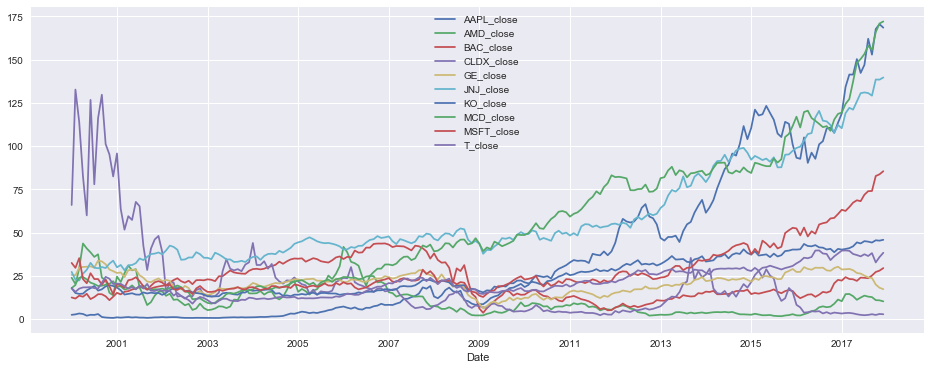

In [26]:
adj_close1 = pd.concat([dates,adj_close],axis=1).rename(columns={'0':'Date'}).set_index('Date')
adj_close1.plot(figsize=(16,6))
plt.show()

In [27]:
corr = pd.DataFrame(np.corrcoef(pct_returns.transpose()),index=pct_returns.columns,columns=pct_returns.columns)
corr

,AAPL_return,AMD_return,BAC_return,CLDX_return,GE_return,JNJ_return,KO_return,MCD_return,MSFT_return,T_return
AAPL_return,1.000000,0.435559,0.182154,0.275384,0.262613,0.008083,0.027659,0.146967,0.441657,0.015072
AMD_return,0.435559,1.000000,0.307840,0.198877,0.394807,0.059536,0.060038,0.189738,0.377208,0.146985
BAC_return,0.182154,0.307840,1.000000,0.143723,0.541322,0.217736,0.131134,0.191796,0.280477,0.093573
CLDX_return,0.275384,0.198877,0.143723,1.000000,0.213514,0.050622,-0.006669,0.014402,0.286617,0.002473
GE_return,0.262613,0.394807,0.541322,0.213514,1.000000,0.354040,0.276596,0.316064,0.383773,0.324806
JNJ_return,0.008083,0.059536,0.217736,0.050622,0.354040,1.000000,0.439788,0.286405,0.124858,0.211526
KO_return,0.027659,0.060038,0.131134,-0.006669,0.276596,0.439788,1.000000,0.434868,0.223614,0.302618
MCD_return,0.146967,0.189738,0.191796,0.014402,0.316064,0.286405,0.434868,1.000000,0.224483,0.375038
MSFT_return,0.441657,0.377208,0.280477,0.286617,0.383773,0.124858,0.223614,0.224483,1.000000,0.239764
T_return,0.015072,0.146985,0.093573,0.002473,0.324806,0.211526,0.302618,0.375038,0.239764,1.000000


In [ ]:
pct_returns.transpose()

In [28]:
adj_close1.columns = [c.replace('_close','') for c in adj_close1.columns]

In [31]:
merged.to_csv('tableau_transformed.csv')         #Tableau Transformed
pd.DataFrame(corr.stack()).reset_index().to_csv('correlation.csv') #Correlations
adj_close1.to_csv('closing_prices.csv')  #Closing Prices

In [32]:
print merged.shape

(1622880, 11)


In [39]:
##only use optimal?
merged_opt = merged[merged['is_optimal'] == 1.0]

In [45]:
merged_opt['key'] = merged_opt['portfolio'].apply(lambda x: x.replace('_',', '))

/Users/davidherook/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [48]:
merged_opt['key'] = merged_opt['key'] + ' ' + merged_opt['ind'].astype(str)

/Users/davidherook/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [50]:
merged_opt.to_csv('tableau_transformed.csv')

In [51]:
merged_opt['key'].nunique()

7986